In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Mall_Customers.csv")

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.shape

(200, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
X = data.iloc[:,[3,4]]

In [7]:
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


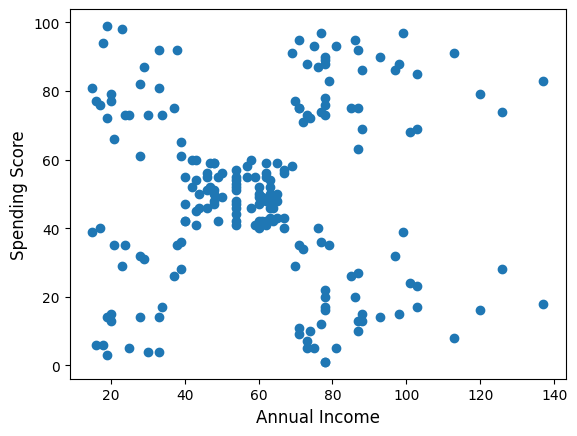

In [40]:
plt.figure()
plt.scatter(X["Annual Income (k$)"], X["Spending Score (1-100)"])
plt.xlabel("Annual Income", fontsize = 12)
plt.ylabel("Spending Score", fontsize = 12)
plt.show()

In [14]:
from sklearn.cluster import KMeans
s = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 0, init = 'k-means++', n_init = 10)
    kmeans.fit(X)
    s.append(kmeans.inertia_)

In [16]:
s[::-1]

[19657.783608703958,
 21862.09267218289,
 25050.832307547527,
 30259.657207285465,
 37265.86520484346,
 44448.45544793371,
 73679.78903948836,
 106348.37306211118,
 181363.595959596,
 269981.28]

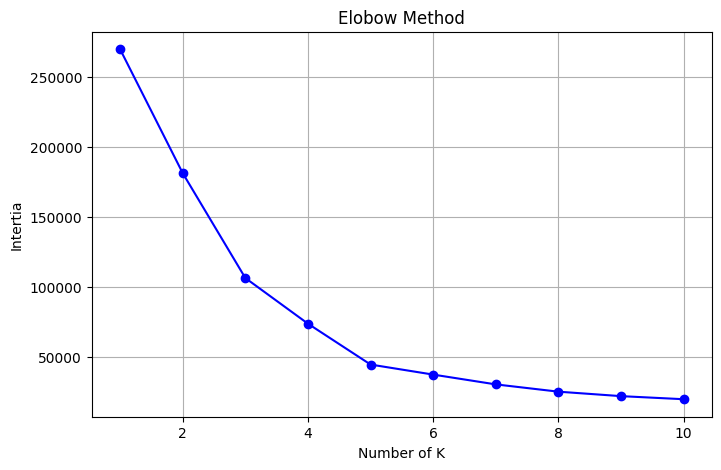

In [30]:
plt.figure(figsize = (8,5))

plt.plot(range(1,11), s, marker = 'o', linestyle = '-', color = 'b')
plt.title("Elobow Method")
plt.xlabel("Number of K")
plt.ylabel("Intertia")
plt.grid()
plt.show()

In [41]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

0.44760979994374317

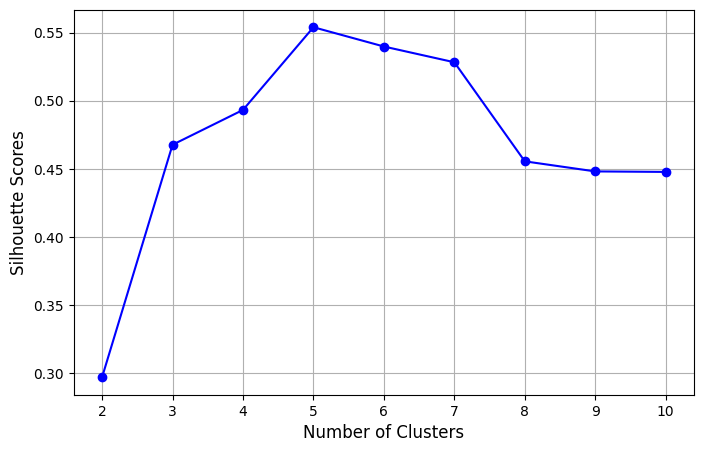

In [55]:
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 78, n_init = 10)
    labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize = (8, 5))

plt.plot(range(2,11), silhouette_scores, marker = 'o', linestyle = '-', color = 'b')
plt.xlabel("Number of Clusters", fontsize = 12)
plt.ylabel("Silhouette Scores", fontsize = 12)
plt.grid()
plt.show()

# This figure shows that 5 clusters is ideal, but it also underlines the fact that k = 6 and k = 7 are not a bad choice, 
# it wasn't visible when comparing inertias

In [78]:
X = X.to_numpy()

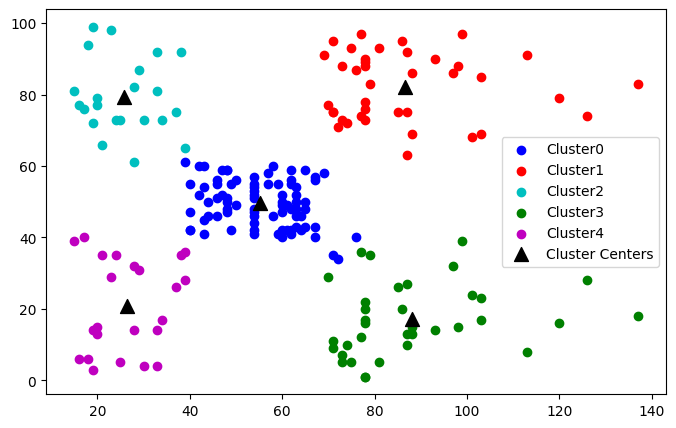

In [88]:
model = KMeans(n_clusters = 5, n_init = 10, init = 'k-means++', random_state = 42)
cluster_labels = model.fit_predict(X)
cluster_centers = model.cluster_centers_
colors = ['b', 'r', 'c', 'g', 'm']

plt.figure(figsize = (8, 5))
for i in range(5):
    plt.scatter(X[cluster_labels == i, 0], X[cluster_labels == i, 1], c = colors[i], label = f"Cluster{i}")

plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s = 100, c = 'k', marker = '^', label = 'Cluster Centers')
plt.legend()
plt.show()

In [81]:
cluster_centers

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])